# Usage Of Reference Data Module 
This notebook demonstrates the usage of Worldcereal Reference data module data APIs

The project website: https://esa-worldcereal.org/en
The Worlcereal Reference data module website: https://rdm.cloud.esa-worldcereal.org/
The complete documentation of data APIs can be found as swagger publish here - https://rdmapi.cloud.esa-worldcereal.org/swagger/index.html

The APIs are gaurded by authentication server, so all the REST calls require login. In this notebook demo user 'demo_rdm' is used to fetch the authentication token. Users are requested to get their own login by sending mail to moderator-worldcereal@iiasa.ac.at. 
Once you have your credentials ready replace in the below code for fetching authentication tokens.

After you get the Authentication token you can all any api in the above url using the headers as shown in below calls.

# Get Authorization Token for the API

In [1]:
import requests

##################Declarations#############################
authBaseUrl = 'https://auth.cloud.esa-worldcereal.org'
apiUrl = 'https://rdmapi.cloud.esa-worldcereal.org/data'

data = {
    'username': 'demo_rdm', #demo credentials used here, use your login
    'password': 'rdmlpsdemo2022', #demo credentials used here, use your password
    'client_id': 'auth',
    'grant_type': 'password',
}
############################################################

tokenResponse = requests.post(f'{authBaseUrl}/realms/worldcereal/protocol/openid-connect/token', data=data)

token = tokenResponse.json()

token

{'access_token': 'eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICIwVEE1Y2ZuVE5UTVc2dDFxLXp2Nk1MNjRIZV9YU1JWUko5cFdtbHhrUEZVIn0.eyJleHAiOjE2Njg1MDE0NzgsImlhdCI6MTY2ODUwMDg3OCwianRpIjoiZTk3M2VmMmMtODA2ZC00NmVhLTk0NzUtN2YwN2M4Yjk1ZmM2IiwiaXNzIjoiaHR0cHM6Ly9hdXRoLmNsb3VkLmVzYS13b3JsZGNlcmVhbC5vcmcvcmVhbG1zL3dvcmxkY2VyZWFsIiwiYXVkIjpbIndjdGlsZXIiLCJyZG1hcGkiLCJwcm9jZXNzaW5nIiwicmRtIiwiYXBpIiwidmRtYXBpIiwiYWNjb3VudCIsInZkbSJdLCJzdWIiOiIyNjNkZGYwOC01MzllLTQ0NjMtOTZkMS01MDk3MGNhNWNmYWMiLCJ0eXAiOiJCZWFyZXIiLCJhenAiOiJhdXRoIiwic2Vzc2lvbl9zdGF0ZSI6IjQ2NDVjNzFmLWM2YzAtNGM5NS1hMjFhLTFmMjQ5ZjliZTgyOSIsInJlYWxtX2FjY2VzcyI6eyJyb2xlcyI6WyJkZWZhdWx0LXJvbGVzLXdvcmxkY2VyZWFsIiwib2ZmbGluZV9hY2Nlc3MiLCJ1bWFfYXV0aG9yaXphdGlvbiIsInVzZXIiXX0sInJlc291cmNlX2FjY2VzcyI6eyJ3Y3RpbGVyIjp7InJvbGVzIjpbIndjdGlsZXJfcm9sZSJdfSwicmRtYXBpIjp7InJvbGVzIjpbInJkbWFwaV9yb2xlIl19LCJwcm9jZXNzaW5nIjp7InJvbGVzIjpbInByb2Nlc3Npbmdfcm9sZSJdfSwicmRtIjp7InJvbGVzIjpbInJkbV9yb2xlIl19LCJhcGkiOnsicm9sZXMiOlsiYXBpX3JvbGUiXX0sInZkbWFwaSI6ey

# Form Authentication Headers
This is required by all the REST calls in this notebook

In [ ]:

tokentype = token['token_type']
accessToken = token['access_token']
headers = {
    'Authorization': f'{tokentype} {accessToken}',
}

headers

# Get All Public Collections

In [3]:
collectionResponse = requests.get(f'{apiUrl}/collections', headers=headers)
collectionResponse.json()

{'totalCount': 91,
 'items': [{'collectionId': '2016afoafpoint110',
   'title': 'MEL agronomic survey eastern Africa, 2016',
   'featureCount': 3780,
   'type': 'Point',
   'accessType': 'Public',
   'typeOfObservationMethod': 'FieldObservationSurvey',
   'confidenceLandCover': 89.2,
   'confidenceCropType': 85.7,
   'confidenceIrrigationType': 0,
   'landCovers': [11, 10],
   'cropTypes': [9998, 1200, 7100, 5100],
   'irrTypes': [0],
   'extent': {'spatial': {'bbox': [[28.892598210208625,
       -2.668523159304346,
       35.392040089688045,
       1.0134526537095285]],
     'crs': 'http://www.opengis.net/def/crs/OGC/1.3/CRS84'},
    'temporal': {'interval': [['2016-05-01T00:00:00', '2016-08-01T00:00:00']],
     'trs': 'http://www.opengis.net/def/uom/ISO-8601/0/Gregorian'}},
   'additionalData': None,
   'crs': ['http://www.opengis.net/def/crs/EPSG/0/4326'],
   'lastModificationTime': None,
   'lastModifierId': None,
   'creationTime': '2022-10-28T09:58:22.464379',
   'creatorId': Non

# Get Features from a given collection

In [4]:
collectionId = collectionResponse.json()['items'][0]['collectionId']

itemUrl = f'{apiUrl}/collections/{collectionId}/items'

itemsResponse = requests.get(itemUrl, headers=headers)
itemsResponse.json()

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Point',
    'coordinates': [35.056013770094886, 0.9243452218668288]},
   'properties': {'sampleID': '2016_AF_OAF_POINT_110699',
    'LC': 11,
    'CT': 1200,
    'IRR': 0,
    'valtime': '2016-08-01',
    'split': 'CAL'}},
  {'type': 'Feature',
   'geometry': {'type': 'Point',
    'coordinates': [35.03739697006025, 0.923798033619687]},
   'properties': {'sampleID': '2016_AF_OAF_POINT_110704',
    'LC': 11,
    'CT': 1200,
    'IRR': 0,
    'valtime': '2016-08-01',
    'split': 'CAL'}},
  {'type': 'Feature',
   'geometry': {'type': 'Point',
    'coordinates': [35.042416730183916, 0.9329469126596585]},
   'properties': {'sampleID': '2016_AF_OAF_POINT_110703',
    'LC': 11,
    'CT': 9998,
    'IRR': 0,
    'valtime': '2016-08-01',
    'split': 'CAL'}},
  {'type': 'Feature',
   'geometry': {'type': 'Point',
    'coordinates': [35.05771797989848, 0.9322053050458716]},
   'properties': {'sampleID': '201

# Search Collections with Bounding Box, Land CoverTypes, Crop Types, Irrigation Types and Validity Time
The data APIs provide a way to search for collections with filter parameters. Refer the swagger documentation for filter details.
The below script demonstrates how we can call the REST APIs to search for the collections.

In [5]:
bbox='&Bbox=16.170845&Bbox=47.429249&Bbox=16.824188&Bbox=47.644111' #bbox: minimum longitude, minimum latitude, maximum longitude and maximum latitude 
valTime='ValidityTime.Start=2019-01-01T00%3A00%3A00Z&ValidityTime.End=2019-12-30T00%3A00%3A00Z' # date time in yyyy-MM-ddTHH:mm:ssZ format with url escaped
landcovers='&LandCoverTypes=11' #annual cropland
cropTypes='&CropTypes=1100&CropTypes=1110&CropTypes=1120' # wheat, winter wheat and spring wheat
irrigationTypes='&IrrigationTypes=0'
colSearchUrl=f'{apiUrl}/collections/search?{valTime}{landcovers}{cropTypes}{irrigationTypes}{bbox}'

colSearchResponse = requests.get(colSearchUrl, headers=headers)
colSearchResponse.json()

[{'collectionId': '2019atopendataaustriapoly110',
  'title': 'Austria LPIS 2019',
  'featureCount': 2529240,
  'type': 'Polygon',
  'accessType': 'Public',
  'typeOfObservationMethod': 'FormalDeclaration',
  'confidenceLandCover': 100,
  'confidenceCropType': 94,
  'confidenceIrrigationType': 0,
  'landCovers': [13, 11, 12, 40, 0, 30, 10, 60, 70, 99],
  'cropTypes': [9120,
   9100,
   1200,
   6224,
   1520,
   0,
   1110,
   1510,
   9500,
   9998,
   1700,
   2260,
   4100,
   1910,
   2390,
   1610,
   5100,
   9110,
   1920,
   7900,
   4380,
   8100,
   1120,
   3210,
   1400,
   3510,
   2900,
   1800,
   9520,
   7600,
   3490,
   3630,
   3690,
   1100,
   4300,
   3540,
   3530,
   3900,
   3520,
   3550,
   9213,
   3560,
   7700,
   9510,
   4330,
   6219,
   3450,
   7100,
   6212,
   3590,
   9300,
   7300,
   2210,
   1620,
   1600,
   2100,
   4350,
   3300,
   1900,
   9920,
   4390],
  'irrTypes': [0],
  'extent': {'spatial': {'bbox': [[9.531354722129782,
      46.4203

# Search for Feature Items with Bounding Box, Land Cover Types, Crop Types, Irrigation Types and Validity Time


In [6]:

itemSearchCollectionId=colSearchResponse.json()[0]['collectionId']
itemSearchUrl = f'{apiUrl}/collections/{itemSearchCollectionId}/items?{valTime}{landcovers}{cropTypes}{irrigationTypes}{bbox}'
itemSearchResponse = requests.get(itemSearchUrl, headers=headers)
itemSearchResponse.json()

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[16.289357079684287, 47.538275880515656],
      [16.289013967782058, 47.5386102398005],
      [16.288998995202228, 47.53864906269771],
      [16.288564987416922, 47.53903866719194],
      [16.288374857586923, 47.53924491420047],
      [16.28836225817867, 47.539256385262625],
      [16.28866323833627, 47.53937339498895],
      [16.288906201394923, 47.53951043649787],
      [16.289032311681645, 47.53958537019064],
      [16.289033198391273, 47.539585059238966],
      [16.289204485775837, 47.53941007139978],
      [16.289523512847794, 47.53908076177542],
      [16.289725545669818, 47.53886707515546],
      [16.289851775763385, 47.53874006652573],
      [16.289899225761445, 47.5386907369693],
      [16.28963558471557, 47.53847526630038],
      [16.289357079684287, 47.538275880515656]]]},
   'properties': {'sampleID': 'at2019lpis92132',
    'LC': 11,
    'CT': 1110,
    'I

# Display Results on Map

In [ ]:

import random
from ipyleaflet import (Map, GeoData, basemaps, WidgetControl, GeoJSON,
 LayersControl, Icon, Marker,basemap_to_tiles, Choropleth,
 MarkerCluster, Heatmap,SearchControl, 
 FullScreenControl, Popup, DrawControl, Rectangle) 

center=[47.506186,16.410999]
zoom=8
m=Map(basemap=basemaps.CartoDB.Positron, center=center, zoom=zoom)


aoi = Rectangle(bounds=[[ 47.429249,16.170845], [ 47.644111,16.8241884]], color="tomato", weight=2) 


def random_color(feature):
    return {
        'color': 'black',
        'fillColor': random.choice(['red', 'yellow', 'green', 'orange']),
    }
data = itemSearchResponse.json()
layer= GeoJSON(
    data=data,
    style={
        'opacity': 1, 'fillOpacity': 0.5, 'weight': 2
    },
    hover_style={
        'color': 'white', 'dashArray': '0', 'fillOpacity': 0.5
    },
    point_style={'radius': 5, 'color': 'red', 'fillOpacity': 0.8, 'fillColor': 'blue', 'weight': 3},
    style_callback=random_color
)

#def hover_handler(event=None, feature=None, id=None, properties=None):
#properties["LC"]


#layer.on_hover(hover_handler)

#add layers
m.add_layer(aoi)
m.add_layer(layer)
# display map
m

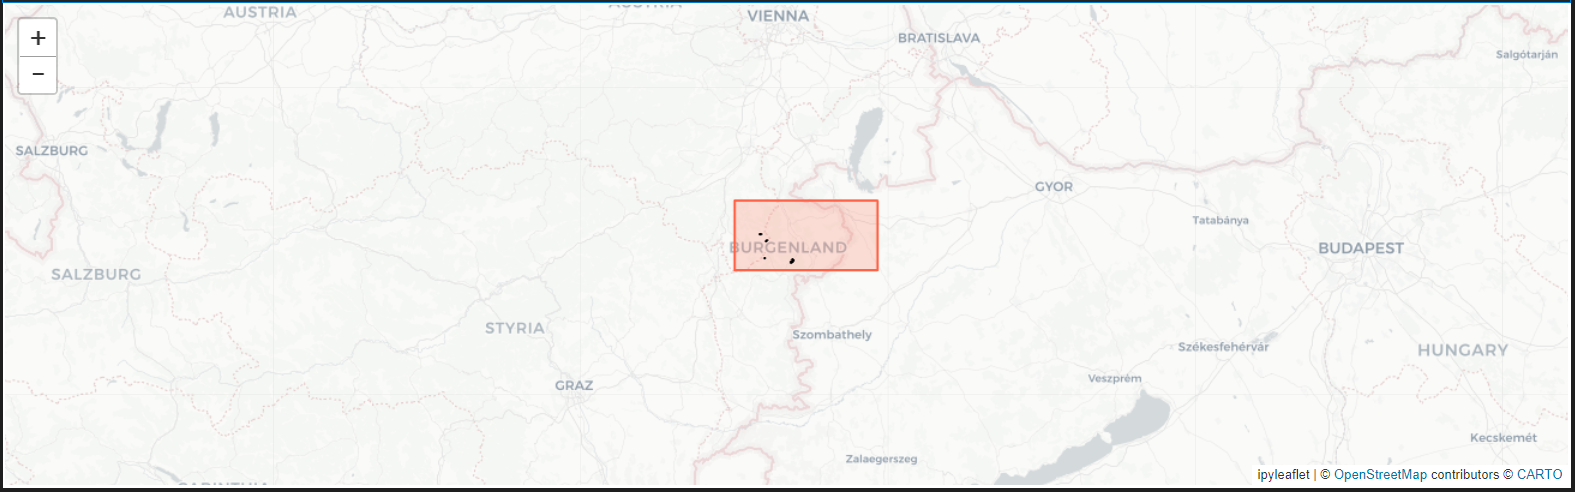

In [16]:
from IPython.display import Image
Image(filename='image.jpg') 